In [1]:
import torch
import numpy as np

from neurocode.datasets import SLEMEG, RecordingDataset
from neurocode.samplers import SignalSampler
from braindecode.datautil.windowers import create_fixed_length_windows
from braindecode.datautil.preprocess import preprocess, Preprocessor, zscore

torch.manual_seed(73)
np.random.seed(73)

In [2]:
load_model_ = False
subjects = list(range(30, 34))
recordings = [0,1,2,3]
n_samples = 20
batch_size = 32
window_size_s = 5.
n_channels = 3
n_views = 2
n_epochs = 50
temperature = .1
sfreq = 200
window_size_samples = np.ceil(sfreq * window_size_s).astype(int)
emb_size = 256
latent_size = 100

In [3]:
preprocessors = [Preprocessor(lambda x: x*1e12)]
dset = SLEMEG(subjects=subjects, recordings=recordings, preload=True,
        load_meg_only=True, preprocessors=preprocessors, cleaned=True)

windows_dataset = create_fixed_length_windows(dset, start_offset_samples=0,
        stop_offset_samples=0, drop_last_window=True, window_size_samples=window_size_samples,
        window_stride_samples=window_size_samples, preload=True)

preprocess(windows_dataset, [Preprocessor(zscore)])
dataset = RecordingDataset(windows_dataset.datasets, dset.labels, sfreq=sfreq, channels='MEG')

Opening raw data file D:\DA231X-Degree-Project\data/data-cleaned/sub-30_ses-con_task-rest_ec_ds_raw.fif...
    Range : 6000 ... 68399 =     30.000 ...   341.995 secs
Ready.
Reading 0 ... 62399  =      0.000 ...   311.995 secs...
Opening raw data file D:\DA231X-Degree-Project\data/data-cleaned/sub-30_ses-con_task-rest_eo_ds_raw.fif...
    Range : 14600 ... 76799 =     73.000 ...   383.995 secs
Ready.
Reading 0 ... 62199  =      0.000 ...   310.995 secs...
Opening raw data file D:\DA231X-Degree-Project\data/data-cleaned/sub-30_ses-psd_task-rest_ec_ds_raw.fif...
    Range : 6400 ... 68799 =     32.000 ...   343.995 secs
Ready.
Reading 0 ... 62399  =      0.000 ...   311.995 secs...
Opening raw data file D:\DA231X-Degree-Project\data/data-cleaned/sub-30_ses-psd_task-rest_eo_ds_raw.fif...
    Range : 4400 ... 67199 =     22.000 ...   335.995 secs
Ready.
Reading 0 ... 62799  =      0.000 ...   313.995 secs...
Opening raw data file D:\DA231X-Degree-Project\data/data-cleaned/sub-31_ses-con_tas

C:\Users\wille\anaconda3\lib\site-packages\braindecode\datautil\windowers.py:174: UserWarning: Meaning of `trial_stop_offset_samples`=0 has changed, use `None` to indicate end of trial/recording. Using `None`.
  warnings.warn(


0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
62 matching events found
No baseline correction applied
0 projection items activated
Loading data for 62 events and 1000 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
62 matching events found
No baseline correction applied
0 projection items activated
Loading data for 62 events and 1000 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
62 matching events found
No baseline correction applied
0 projection items activated
Loading data for 62 events and 1000 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
63 matching events found
No baseline correction applied
0 projection items activated
Loading data for 63 events and 1000 original time points ...
0 bad epochs dropped
Adding metadata

0.29280697473582373 353 646 1000


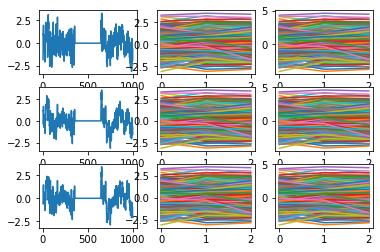

0.25356939473758905 373 626 1000


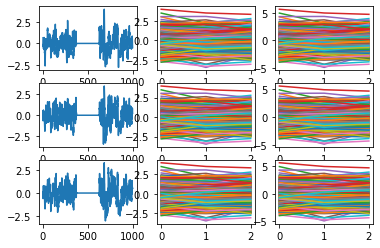

0.24789669508335754 376 623 1000


KeyboardInterrupt: 

In [4]:
sampler = SignalSampler(dataset.get_data(), dataset.get_labels(),
    dataset.get_info(), n_channels=n_channels, n_views=n_views, n_samples=n_samples, batch_size=batch_size)

for _ in sampler:
    pass